In [1]:
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
df = pd.read_csv("../data/fintech_reviews.csv")
df.head()


,review,rating,date,bank,source
0,good,5,2025-06-03 11:32:52,CBE,Google Play
1,it is not safety,1,2025-06-03 09:14:31,CBE,Google Play
2,NICE bank,5,2025-06-03 08:42:36,CBE,Google Play
3,abdii.abas ab.musa,3,2025-06-02 14:46:11,CBE,Google Play
4,it is like a childish app make it better the w...,1,2025-06-02 12:23:42,CBE,Google Play


In [3]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1447 entries, 0 to 1446
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  1447 non-null   object
 1   rating  1447 non-null   int64 
 2   date    1447 non-null   object
 3   bank    1447 non-null   object
 4   source  1447 non-null   object
dtypes: int64(1), object(4)
memory usage: 56.7+ KB


review    0
rating    0
date      0
bank      0
source    0
dtype: int64

Clean the Data

Drop Missing or Empty Reviews


In [4]:
df.dropna(subset=["review", "rating"], inplace=True)
df = df[df["review"].str.strip() != ""]


Remove Duplicates

In [5]:
df.drop_duplicates(subset=["review", "rating", "date", "bank"], inplace=True)


Normalize The Date Format

In [6]:
df["date"] = pd.to_datetime(df["date"])


TASK 2

Sentiment and Thematic Analysis

Label Sentiment

In [7]:
def label_sentiment(rating):
    if rating >= 4:
        return "positive"
    elif rating == 3:
        return "neutral"
    else:
        return "negative"

df["sentiment"] = df["rating"].apply(label_sentiment)


Text Preprocessing

In [8]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"\@w+|\#", "", text)
    text = re.sub(r"[^\w\s]", "", text)
    text = re.sub(r"\d+", "", text)
    text = text.strip()
    return text

df["clean_review"] = df["review"].apply(clean_text)


TF-IDF Vectorization

In [9]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df["clean_review"])
y = df["sentiment"]


Train/Test Sentiment Model (Logistic Regression)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


Evaluation

c:\Users\ads\Desktop\Week 2\fintech-cx\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ads\Desktop\Week 2\fintech-cx\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ads\Desktop\Week 2\fintech-cx\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

              precision    recall  f1-score   support

    negative       0.85      0.59      0.70        69
     neutral       0.00      0.00      0.00        16
    positive       0.83      0.98      0.90       205

    accuracy                           0.83       290
   macro avg       0.56      0.52      0.53       290
weighted avg       0.79      0.83      0.80       290



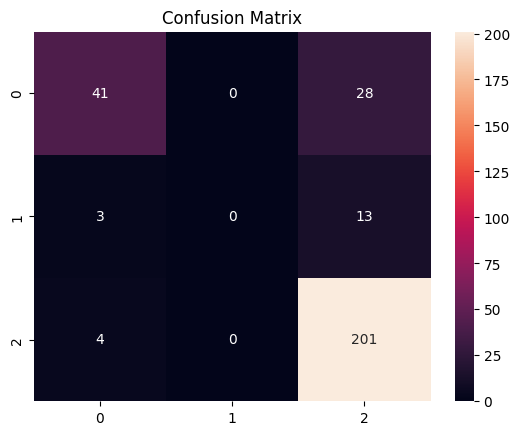

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.show()

In [12]:
df.to_csv("../data/fintech_reviews_cleaned.csv", index=False)


 Sentiment Distribution

Current directory: c:\Users\ads\Desktop\Week 2\fintech-cx\notebooks
Files in directory: ['01_cleaning_and_sentiment.ipynb', 'fintech_reviews.db', '__init__.ipynb']


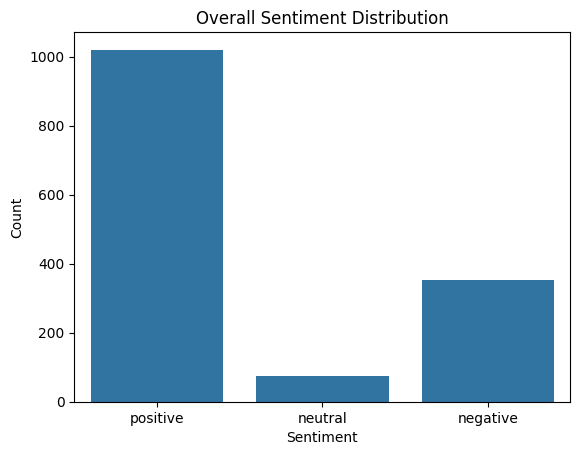

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os

# Check current directory and files
print("Current directory:", os.getcwd())
print("Files in directory:", os.listdir())

# Load the data (adjust path if needed)

df = pd.read_csv("../data/fintech_reviews_cleaned.csv")  # Try relative or absolute path

# Create the count plot
sns.countplot(data=df, x="sentiment", order=["positive", "neutral", "negative"])

# Add titles and labels
plt.title("Overall Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")

# Display the plot
plt.show()

Sentiment per Bank

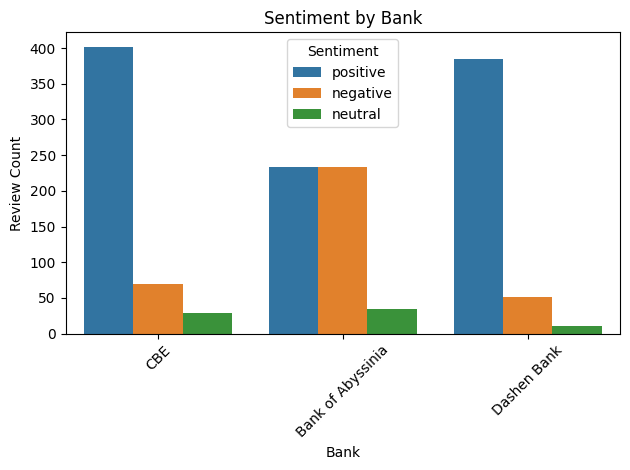

In [14]:
sns.countplot(data=df, x="bank", hue="sentiment", order=df["bank"].value_counts().index)
plt.title("Sentiment by Bank")
plt.xlabel("Bank")
plt.ylabel("Review Count")
plt.legend(title="Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Sentiment Over Time

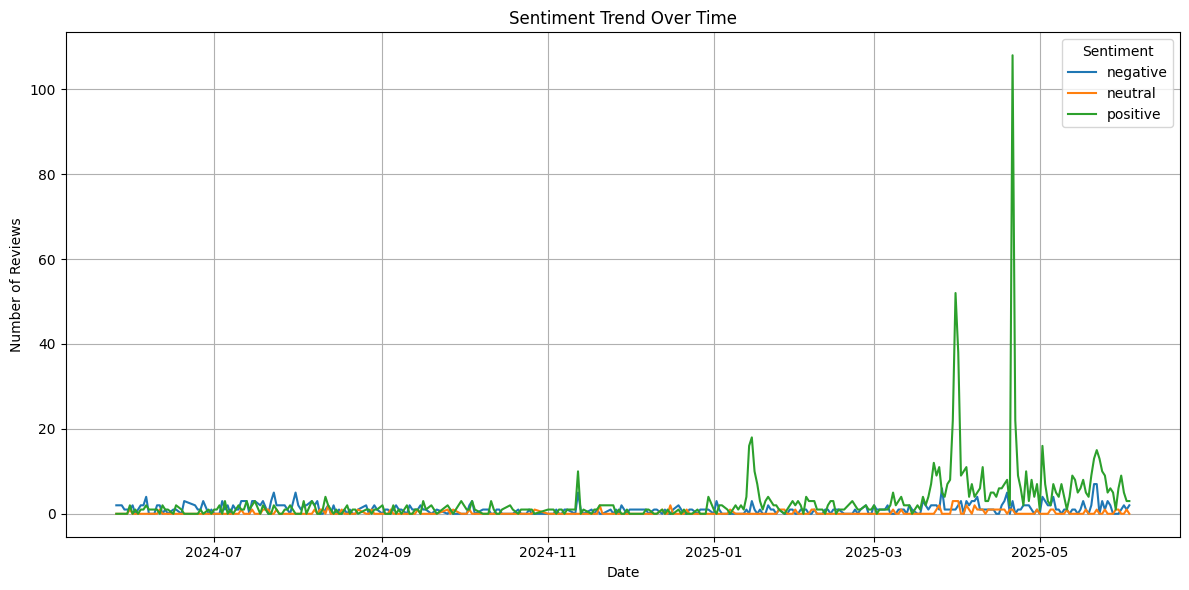

In [15]:
df["date"] = pd.to_datetime(df["date"])
daily_sentiment = df.groupby([df["date"].dt.date, "sentiment"]).size().unstack().fillna(0)

daily_sentiment.plot(kind="line", figsize=(12, 6))
plt.title("Sentiment Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Reviews")
plt.legend(title="Sentiment")
plt.grid(True)
plt.tight_layout()
plt.show()


Save the Cleaned Dataset for Power BI

In [16]:
df[["review", "rating", "date", "bank", "source", "sentiment", "clean_review"]].to_csv("../data/cleaned_reviews.csv", index=False)


In [17]:
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


Preprocess Reviews for Word Frequency

Current directory: c:\Users\ads\Desktop\Week 2\fintech-cx\notebooks
Files in directory: ['01_cleaning_and_sentiment.ipynb', 'fintech_reviews.db', '__init__.ipynb']


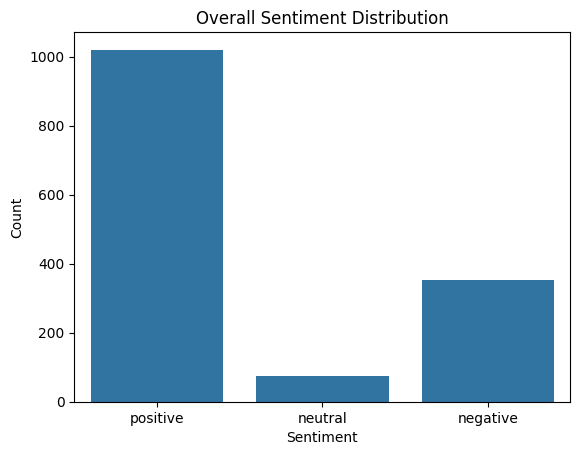

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
from nltk.corpus import stopwords

# Check current directory and files
print("Current directory:", os.getcwd())
print("Files in directory:", os.listdir())

# Load the data (adjust path if needed)
df = pd.read_csv("../data/fintech_reviews_cleaned.csv")

# Define stop words
stop_words = set(stopwords.words('english'))

# Define tokenize function
def tokenize(text):
    if pd.isna(text):
        return []
    if not isinstance(text, str):
        text = str(text)
    tokens = text.lower().split()
    return [word for word in tokens if word.isalpha() and word not in stop_words]

# Apply tokenize function
df["tokens"] = df["clean_review"].apply(tokenize)

# Create the count plot (using sentiment, not tokens directly)
sns.countplot(data=df, x="sentiment", order=["positive", "neutral", "negative"])

# Add titles and labels
plt.title("Overall Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")

# Display the plot
plt.show()

Top Words by Sentiment

In [19]:
def get_top_words(data, sentiment, n=10):
    words = [word for tokens in data[data["sentiment"] == sentiment]["tokens"] for word in tokens]
    return Counter(words).most_common(n)

for sentiment in ["positive", "neutral", "negative"]:
    top = get_top_words(df, sentiment)
    print(f"\nTop words for {sentiment}:")
    for word, count in top:
        print(f"{word}: {count}")



Top words for positive:
app: 353
good: 198
best: 122
bank: 97
dashen: 97
banking: 89
nice: 72
super: 71
one: 69
use: 60

Top words for neutral:
good: 19
app: 15
please: 6
fix: 6
like: 6
dont: 5
update: 5
time: 5
easy: 5
use: 5

Top words for negative:
app: 204
bank: 54
work: 44
banking: 41
worst: 37
mobile: 35
working: 32
please: 31
ever: 30
even: 30


Top Bigrams (2-word phrases)

In [20]:
def get_top_bigrams(data, sentiment, n=10):
    all_bigrams = []
    for tokens in data[data["sentiment"] == sentiment]["tokens"]:
        bigrams = list(ngrams(tokens, 2))
        all_bigrams.extend(bigrams)
    return Counter(all_bigrams).most_common(n)

for sentiment in ["positive", "negative"]:
    print(f"\nTop bigrams for {sentiment} reviews:")
    for bigram, count in get_top_bigrams(df, sentiment):
        print(f"{' '.join(bigram)}: {count}")



Top bigrams for positive reviews:
dashen bank: 54
best app: 46
super app: 43
good app: 33
easy use: 29
mobile banking: 26
one step: 24
banking app: 22
dashen super: 21
step ahead: 18

Top bigrams for negative reviews:
mobile banking: 26
doesnt work: 20
app ever: 17
banking app: 14
worst app: 14
developer options: 10
turn developer: 8
worst mobile: 8
developer mode: 7
dont know: 7


Task 3

Load CSV to Oracle

In [42]:
import sqlite3

# Drop and recreate the table with all expected columns
conn = sqlite3.connect("fintech_reviews.db")
cursor = conn.cursor()

cursor.execute("DROP TABLE IF EXISTS fintech_review")

cursor.execute("""
CREATE TABLE fintech_review (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    review TEXT,
    rating INTEGER,
    date TEXT,
    bank TEXT,
    source TEXT,
    sentiment TEXT,
    clean_review TEXT
)
""")

conn.commit()
conn.close()

print("✅ Table recreated successfully.")


✅ Table recreated successfully.


Modify the Table to Include All Fields

In [43]:
conn = sqlite3.connect("fintech_reviews.db")
df.to_sql("fintech_review", conn, if_exists="replace", index=False)
conn.close()

print("✅ Data inserted and table auto-created.")


✅ Data inserted and table auto-created.


Insert DataFrame into the SQLite Table

In [45]:
conn = sqlite3.connect("fintech_reviews.db")
df_check = pd.read_sql_query("SELECT * FROM fintech_review LIMIT 5", conn)
conn.close()
print(df_check)


                                              review  rating  \
0                                               good       5   
1                                   it is not safety       1   
2                                          NICE bank       5   
3                                 abdii.abas ab.musa       3   
4  it is like a childish app make it better the w...       1   

                  date bank       source sentiment  \
0  2025-06-03 11:32:52  CBE  Google Play  positive   
1  2025-06-03 09:14:31  CBE  Google Play  negative   
2  2025-06-03 08:42:36  CBE  Google Play  positive   
3  2025-06-02 14:46:11  CBE  Google Play   neutral   
4  2025-06-02 12:23:42  CBE  Google Play  negative   

                                        clean_review  
0                                               good  
1                                   it is not safety  
2                                          nice bank  
3                                   abdiiabas abmusa  
4  it is like a

In [46]:
df.groupby("bank")["sentiment"].value_counts(normalize=True).unstack()


sentiment,negative,neutral,positive
bank,,,
Bank of Abyssinia,0.466000,0.068000,0.466000
CBE,0.138000,0.058000,0.804000
Dashen Bank,0.114094,0.024609,0.861298
